In [1]:
import os
import sys

cwd0 = '../config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Tuesday 01 November 2022, 18:42:18  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="../config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

### **Exercices.** Lecture et analyse de la base de données par la librairie pandas.<br>Corrigé

#### Importation des modules utiles

In [1]:
# exécutez cette cellule, sans la modifier
%matplotlib inline
import numpy as np 
from pylab import *
# d'autres bibliothèques seront importées au fur et à mesure des besoins

#### **Exercice 1**. Création des données au format np.array, puis au format pandas

<div class="rq">La première partie a pour but de créer des données au format <code>pandas</code>. Certaines sont corrélées entre elles. On vérifiera dans la deuxième partie que la carte thermique est cohérente avec les corrélations</div>

##### **1.** Création des données.

Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter. On va générer :
- un jeu de 100 valeurs aléatoires X1, comprises entre [-10, 10]
- un deuxième jeu de 100 valeurs aléatoires X2, dans le même intervalle
- des valeurs bruitées, autour d'une fonction $f_1(x)=2x$
- des valeurs bruitées, autour d'une fonction $f_2(x)=-3x$  


Pour $f_1$ et $f_2$, les valeurs de $x$ seront celles du tableau X1. Les données sont stockées dans deux tableaux `data1` et `data2`.

In [3]:
# exécutez cette cellule, sans la modifier
import random

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,nbp)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 2*x
def f2(x):
    return -3*x

nbp = 100
xmin = -10
xmax = 10. 
# vecteurs X1 & X2
# random.uniform(low=0.0, high=1.0, size=None)
X1 = np.random.uniform(xmin,xmax,nbp)
X2 = np.random.uniform(xmin,xmax,nbp)

data1 = noiseF(f1,X1)
data2 = noiseF(f2,X1)

##### **2a.** Affichage des données contenues dans `data1` et `data2`

Affichez le type (`type`) des variables `data1` et `data2` ainsi que leur forme (`shape`), puis enfin leur contenu

In [4]:
# entrez ci-dessous votre code python

print(type(data1),type(data2))
print(shape(data1),shape(data2))
print("data1",data1)
print("data2",data2)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 2) (100, 2)
data1 [[  8.79945553  16.11093516]
 [  8.81341564  14.3985887 ]
 [  7.84105335  17.55238486]
 [ -1.23104316  -3.26689317]
 [  1.18013169   6.63445812]
 [  0.39113389  -1.32493291]
 [  3.31812351   4.95074218]
 [ -4.57074989  -9.58913541]
 [ -2.8213291   -5.37433812]
 [  2.31425228   2.05663748]
 [  2.31985404   5.78544671]
 [ -3.58841362  -9.62177315]
 [  4.92685085  10.67529654]
 [ -6.1912665  -11.5346906 ]
 [ -2.21275693  -5.96941121]
 [  0.3698268    0.7574516 ]
 [  3.26491735   6.34784747]
 [ -6.47570714 -16.1773813 ]
 [  8.4027987   15.64188018]
 [  1.56223827  -0.38835149]
 [ -8.86700332 -20.93916987]
 [ -8.84770677 -17.1395384 ]
 [ -0.4352926   -4.84573001]
 [ -2.22267538  -2.99231038]
 [ -0.62396079  -1.57306916]
 [ -0.05229976   2.93166771]
 [  4.5375111    9.80667634]
 [ -4.34408924  -8.30779702]
 [  0.6287283    2.84048482]
 [  3.31675703   4.57127929]
 [ -7.69881081 -20.0420546 ]
 [ -5.38787199 -11.43808856]


<div class="warn">

Vous venez de vérifier que `data1` et `data2` sont des tableaux à deux dimensions au format `numpy`. La première colonne contient 100 valeurs de $x$, et la deuxième chacune des valeurs de $f_i(x)$ 

</div>

##### **2b.** Quelques manipulations de tableaux

Affichez seulement les valeurs de $x$ contenues dans `data1`, puis seulement les valeurs de $f_1(x)$, c'est-à-dire les contenus de la première puis de la deuxième colonne. Vérifiez au passage que $f_2(x)$ a été évaluée pour les mêmes valeurs de $x$ que $f_1(x)$, et ce *sans afficher les valeurs de $x$ contenues dans `data2`* 

In [5]:
# entrez ci-dessous votre code python
print("X1 : ",data1[:,0])
print("f1 : ",data1[:,1])
print(data1[:,0] == data2[:,0])

# Remarque : on peut faire un peu mieux, en utilisant np.all(), qui renvoie True si tous les éléments
# d'un tableau numpy sont True et qui renvoie False dans le cas contraire
print("numpy.all() : ",(data1[:,0] == data2[:,0]).all())

X1 :  [ 8.79945553  8.81341564  7.84105335 -1.23104316  1.18013169  0.39113389
  3.31812351 -4.57074989 -2.8213291   2.31425228  2.31985404 -3.58841362
  4.92685085 -6.1912665  -2.21275693  0.3698268   3.26491735 -6.47570714
  8.4027987   1.56223827 -8.86700332 -8.84770677 -0.4352926  -2.22267538
 -0.62396079 -0.05229976  4.5375111  -4.34408924  0.6287283   3.31675703
 -7.69881081 -5.38787199 -6.06739576 -8.56391203 -3.74370435  2.96067771
  8.10425444 -9.91381058  9.5263669  -1.17632276 -0.94375552 -5.79300168
  9.5561398  -1.3282313   9.08188834  7.80795219 -6.91122869  5.39429783
  4.99548673 -9.08827001  5.49524945 -3.72893276 -8.37175239 -4.28545454
  7.53188271 -0.09084912  5.8826053   4.52275731  3.33306066 -0.53581808
  0.85840951 -1.58049536 -7.51244093 -5.1535409   0.26131272 -6.23583394
  4.02940458 -1.85657623 -5.74429205  7.03509421  4.48014168 -5.34750777
 -2.44388854 -7.22905619 -6.49535271 -5.44727132 -3.0569908  -9.09325328
 -6.50798231  9.51784833 -7.17779937 -7.35705

<div class="rq">

Par la suite, les tableaux $x$, $f_1(x)$ et $f_2(x)$ seront désignés X1, X2, f1 et f2

</div>

##### **3.** Tracé des fonctions f1 et f2

On va tracer les 2 fonctions pour voir à quoi elles ressemblent.  Vérifiez de visu que les distributions de points sont cohérentes avec les expressions des fonctions. On suggère d'utiliser la fonction `scatter`, qui prend principalement 2 variables. On recommande d'ajouter un label à chaque tracé : `scatter(tableau des valeurs de x, tableau des valeurs de y, label='votrelabel')`

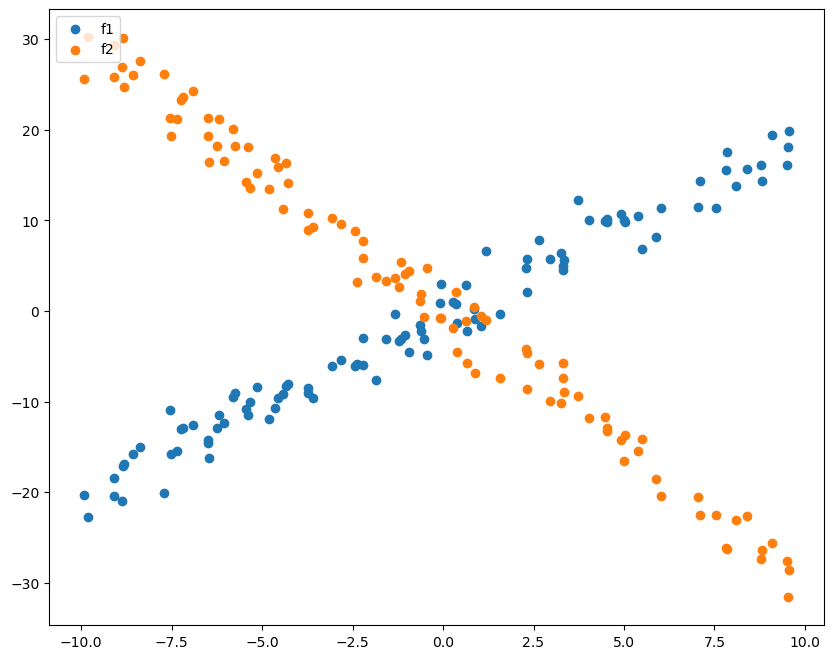

In [6]:
# définition de la taille de la figure
figure(figsize = (10,8))

# entrez ci-dessous votre code python
scatter(data1[:,0],data1[:,1],label='f1')
scatter(data2[:,0],data2[:,1],label='f2')
legend(loc="upper left")

##### **4.** Création et affichage d'un dataframe au format pandas

- Stocker ces données au format pandas dans un tableau nommé `df`. Les deux premières colonnes du tableau `df` vont contenir les valeurs de X1 et X2, et les suivantes les valeurs que prennent les fonctions f1 et f2 pour chacune des valeurs de X1

-  Afficher le tableau `df`, qui contient les données

In [7]:
import pandas as pd

# le tableau df est crée par cette ligne, X1 étant la première colonne
df = pd.DataFrame(X1, columns = ['X1'])

# entrez ci-dessous votre code python pour compléter le dataframe df
df['X2'] = pd.DataFrame(X2)
df['f1'] = pd.DataFrame(data1[:,1])
df['f2'] = pd.DataFrame(data2[:,1])

# entrez ci-dessous votre code python pour afficher le contenu de df
display(df)

,X1,X2,f1,f2
0,8.799456,9.006803,16.110935,-27.352728
1,8.813416,-4.037509,14.398589,-26.369058
2,7.841053,0.076710,17.552385,-26.239504
3,-1.231043,-7.438039,-3.266893,2.678323
4,1.180132,-8.038581,6.634458,-1.022009
...,...,...,...,...
95,6.027288,8.350579,11.353562,-20.464472
96,7.098482,5.240324,14.308155,-22.553483
97,-9.823513,-9.239183,-22.716162,30.205409
98,0.881493,4.013218,-0.873764,-6.852537


#### **Exercice 2.** Analyse statistique basique des données et recherche de possibles corrélations entre données

##### **1.** Statistiques descriptives

Afficher les statistiques descriptives des données contenues dans `df`, c'est-à-dire moyenne, écart-type, etc... (*suggestion*: utiliser la fonction `describe` de pandas)

In [8]:
# entrez ci-dessous votre code python
df.describe()

,X1,X2,f1,f2
count,100.000000,100.000000,100.000000,100.000000
mean,-0.666805,-0.356774,-1.833251,2.178655
std,5.517434,5.837551,11.035327,16.724203
min,-9.913811,-9.983507,-22.716162,-31.598808
25%,-5.402722,-5.302395,-10.756879,-9.997790
50%,-0.783858,0.202058,-2.800078,2.926224
75%,3.431257,5.148470,7.096539,16.474651
max,9.556140,9.554239,19.910635,30.205409


##### **2a.** Recherche des possibles corrélations entre les données
Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot` de seaborn)

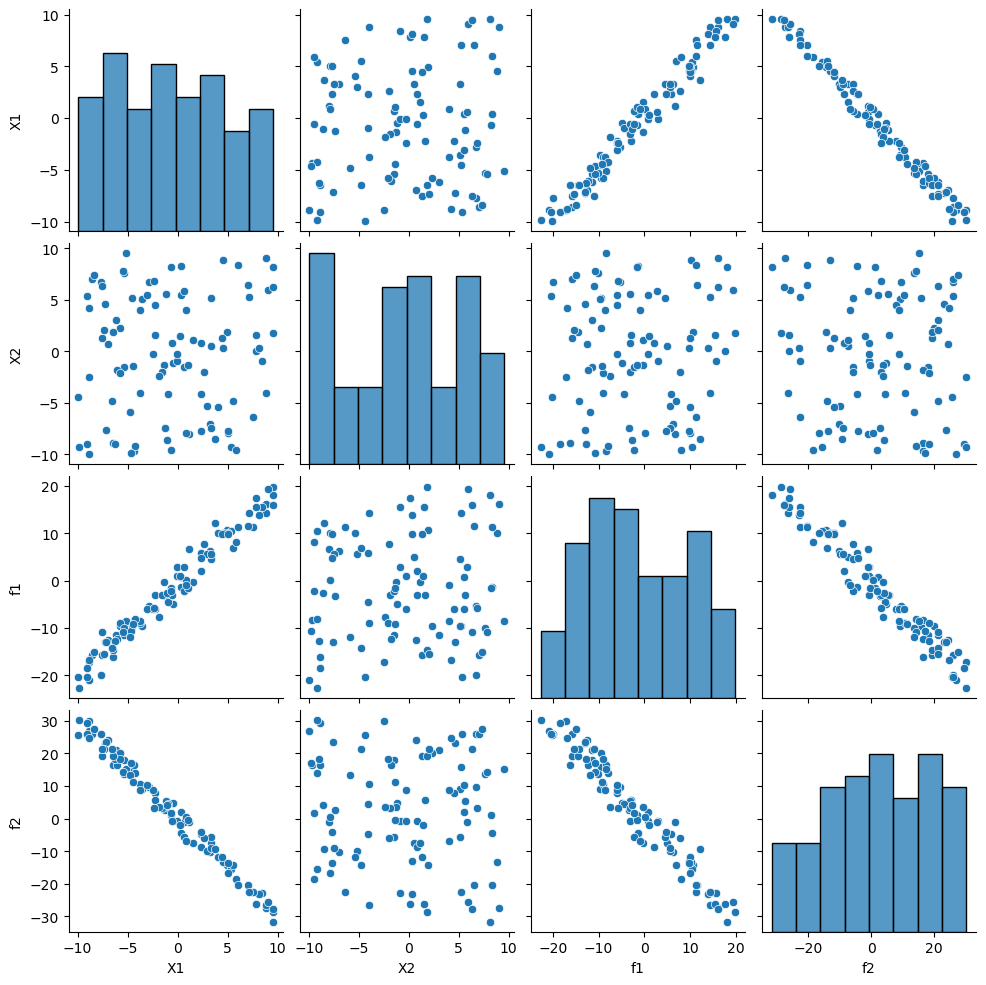

In [9]:
import seaborn as sns
# entrez ci-dessous votre code python
sns.pairplot(df)

##### **2b.** Carte thermique

Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap` de seaborn, avec les options `annot = True, cmap='coolwarm'` et en utilisant les bornes appropriées `vmin` et `vmax`. Le tableau (matrice) de corrélation entre données est quant à lui calculé avec la fonction `corr` de `pandas`)

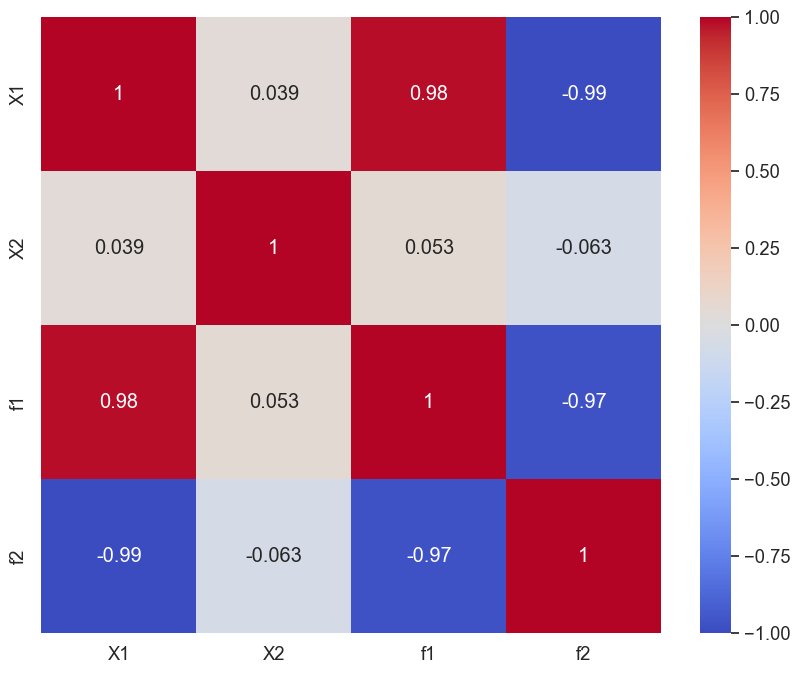

In [10]:
# définition de la taille de la figure et d'une dimension de caractères qui rende la figure lisible
plt.figure(figsize = (10,8))
sns.set(font_scale=1.2)

# entrez ci-dessous votre code python
fig = sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')
savefig("svg-images/heatmap1.png")

<div class="warn">
Si tout va bien, vous venez d'obtenir la carte thermique suivante (<i>les valeurs peuvent légèrement changer compte tenu du bruit statistique,</i> cf variable <code>noise</code></i>):
<p style="text-align: center"><img src="./svg-images/heatmap1-saved.png" style="margin-left:auto; margin-right:auto" id="img_heatmap1"/></p>   
    
<b>Commentaires</b><br>
    <li> les deux séries de variables X1 et X2 ont été générées aléatoirement. Les deux séries sont indépendantes l'une de l'autre, ou bien cela signifierait qu'il y a un problème avec le générateur utilisé
    <li> f1 et f2 sont des fonctions des nombres contenus dans X1. Il ne peut donc pas y avoir de corrélation statistique avec X2.
    <li> f1 étant une fonction croissante de X1 (au bruit statistique près), il y a corrélation positive entre les deux. On ne peut pas obtenir 1 à cause de la petite fluctuation positive introduite (reprenez le sujet et créez un bruit élevé en augmentant la valeur de <code>noise</code>). 
    <li> il y a une forte corrélation négative entre f2 et X1, puisque f2 est une fonction qui décroit en fonction de X1
    <li> la forte corrélation négative entre f1 et f2 est également attendue
</div>

In [11]:
vID.end(cwd0)

**Fin à:** Tuesday 01 November 2022, 18:42:36  
**Durée:** 00:00:18 976ms

<p style="text-align: center"><img width="800px" src="../config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>